### 使用 lm 和 lmList 拟合线性模型

- lm 的一般形式
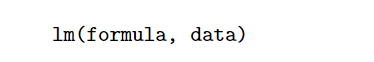

- y = β0 + β1*x1 + β2*x2 + e 在R中表达
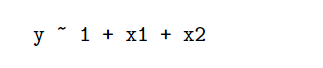

- 左侧表达式可以加函数
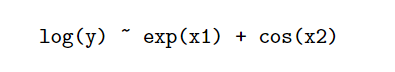



 - 27 名儿童（其中 16 名男孩，11 名女孩）从 8 岁起每隔两年测量一次其脑垂体到翼上颌裂的距离，一直测到 14 岁。

In [2]:
library(nlme)
fm1Orth.lm <- lm( distance ~ age, Orthodont )

In [3]:
fm1Orth.lm   # 等同于 print(fm1Orth.lm)


Call:
lm(formula = distance ~ age, data = Orthodont)

Coefficients:
(Intercept)          age  
    16.7611       0.6602  


- 诊断图

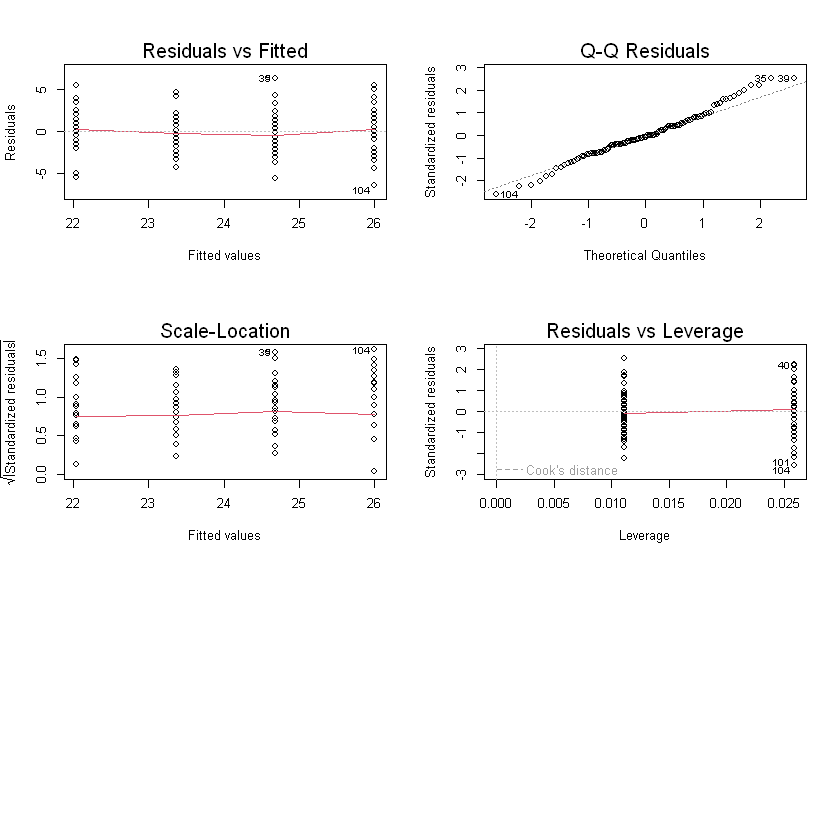

In [6]:
par( mfrow=c(3,2) )
plot( fm1Orth.lm )

- 假设我们想测量男孩和女孩截距和斜率的差异
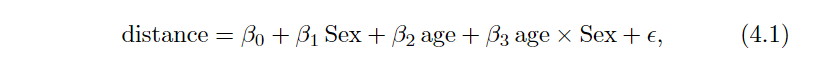

In [7]:
fm2Orth.lm <- update( fm1Orth.lm, formula = distance ~ Sex*age )

- Sex*age 等同于 Sex + age + Sex:age

In [9]:
summary( fm2Orth.lm )


Call:
lm(formula = distance ~ Sex + age + Sex:age, data = Orthodont)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6156 -1.3219 -0.1682  1.3299  5.2469 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    16.3406     1.4162  11.538  < 2e-16 ***
SexFemale       1.0321     2.2188   0.465    0.643    
age             0.7844     0.1262   6.217 1.07e-08 ***
SexFemale:age  -0.3048     0.1977  -1.542    0.126    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.257 on 104 degrees of freedom
Multiple R-squared:  0.4227,	Adjusted R-squared:  0.4061 
F-statistic: 25.39 on 3 and 104 DF,  p-value: 2.108e-12


- 清除 Sex

In [10]:
fm3Orth.lm <- update( fm2Orth.lm, formula = . ~ . - Sex )
summary( fm3Orth.lm )


Call:
lm(formula = distance ~ age + Sex:age, data = Orthodont)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7424 -1.2424 -0.1893  1.2681  5.2669 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.76111    1.08613  15.432  < 2e-16 ***
age            0.74767    0.09807   7.624 1.16e-11 ***
age:SexFemale -0.21473    0.03923  -5.474 3.02e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.249 on 105 degrees of freedom
Multiple R-squared:  0.4215,	Adjusted R-squared:  0.4105 
F-statistic: 38.26 on 2 and 105 DF,  p-value: 3.31e-13


####  每组的单独 lm 拟合：lmList 函数
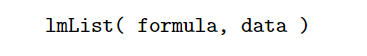

In [13]:
fm1Orth.lis <- lmList( distance ~ age | Subject, Orthodont )

In [14]:
getGroupsFormula( Orthodont )

~Subject

In [15]:
fm1Orth.lis <- lmList( distance ~ age, Orthodont )

In [16]:
formula( Orthodont )

distance ~ age | Subject

In [17]:
fm1Orth.lis <- lmList( Orthodont )

In [18]:
fm1Orth.lis

Call:
  Model: distance ~ age | Subject 
   Data: Orthodont 

Coefficients:
    (Intercept)   age
M16       16.95 0.550
M05       13.65 0.850
M02       14.85 0.775
M11       20.05 0.325
M07       14.95 0.800
M08       19.75 0.375
M03       16.00 0.750
M12       13.25 1.000
M13        2.80 1.950
M14       19.10 0.525
M09       14.40 0.975
M15       13.50 1.125
M06       18.95 0.675
M04       24.70 0.175
M01       17.30 0.950
M10       21.25 0.750
F10       13.55 0.450
F09       18.10 0.275
F06       17.00 0.375
F01       17.25 0.375
F05       19.60 0.275
F07       16.95 0.550
F02       14.20 0.800
F08       21.45 0.175
F03       14.40 0.850
F04       19.65 0.475
F11       18.95 0.675

Degrees of freedom: 108 total; 54 residual
Residual standard error: 1.31004

- pairs 方法提供了随机效应协方差结构的一种视图。

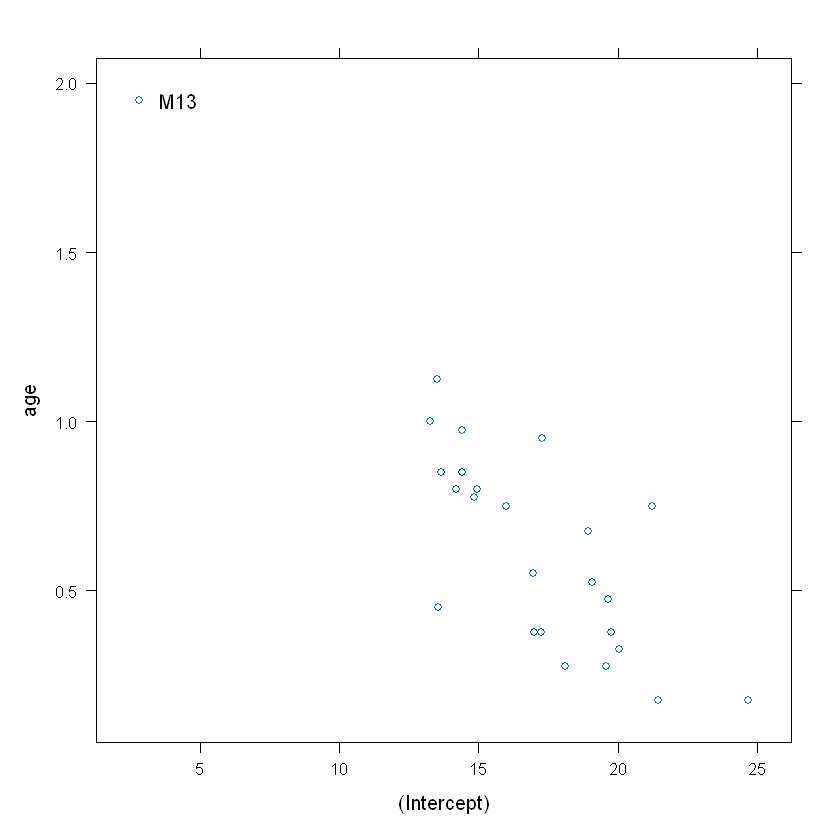

In [19]:
pairs( fm1Orth.lis, id = 0.01, adj = -0.5 )

In [20]:
fm2Orth.lis <- update( fm1Orth.lis, distance ~ I(age-11) )

In [21]:
intervals( fm2Orth.lis )

, , (Intercept)

       lower   est.    upper
M16 21.68676 23.000 24.31324
M05 21.68676 23.000 24.31324
M02 22.06176 23.375 24.68824
M11 22.31176 23.625 24.93824
M07 22.43676 23.750 25.06324
M08 22.56176 23.875 25.18824
M03 22.93676 24.250 25.56324
M12 22.93676 24.250 25.56324
M13 22.93676 24.250 25.56324
M14 23.56176 24.875 26.18824
M09 23.81176 25.125 26.43824
M15 24.56176 25.875 27.18824
M06 25.06176 26.375 27.68824
M04 25.31176 26.625 27.93824
M01 26.43676 27.750 29.06324
M10 28.18676 29.500 30.81324
F10 17.18676 18.500 19.81324
F09 19.81176 21.125 22.43824
F06 19.81176 21.125 22.43824
F01 20.06176 21.375 22.68824
F05 21.31176 22.625 23.93824
F07 21.68676 23.000 24.31324
F02 21.68676 23.000 24.31324
F08 22.06176 23.375 24.68824
F03 22.43676 23.750 25.06324
F04 23.56176 24.875 26.18824
F11 25.06176 26.375 27.68824

, , I(age - 11)

          lower  est.     upper
M16 -0.03729682 0.550 1.1372968
M05  0.26270318 0.850 1.4372968
M02  0.18770318 0.775 1.3622968
M11 -0.26229682 0.325 0.9

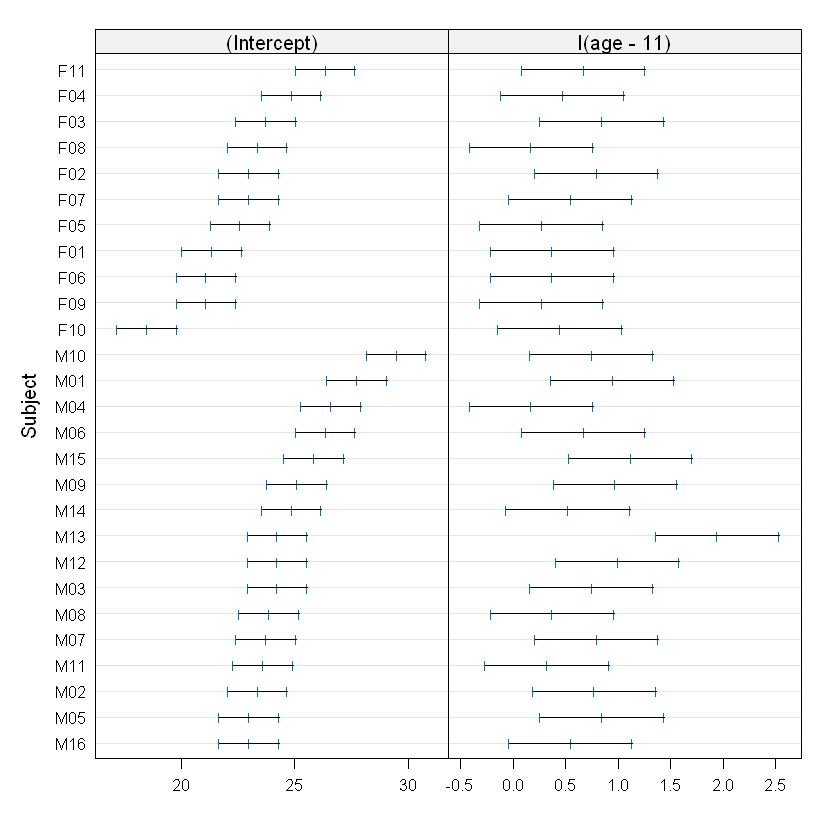

In [22]:
plot( intervals(fm2Orth.lis) )

In [23]:
IGF

,Lot,age,conc
,<ord>,<dbl>,<dbl>
1,1,7,4.90
2,1,7,5.68
3,1,8,5.32
4,1,8,5.50
5,1,13,4.94
6,1,13,5.19
7,1,14,5.18
8,1,14,5.67
9,1,15,5.02


In [24]:
fm1IGF.lis <- lmList( IGF )
coef( fm1IGF.lis )

,(Intercept),age
,<dbl>,<dbl>
9,5.098638,0.005727606
6,4.630000,0.170000000
1,5.492892,-0.007790101
10,6.051628,-0.047328244
2,5.476386,-0.014427119
8,5.592181,0.006063830
5,5.373185,-0.009514050
4,5.576804,-0.016657795
3,5.278809,0.010082956


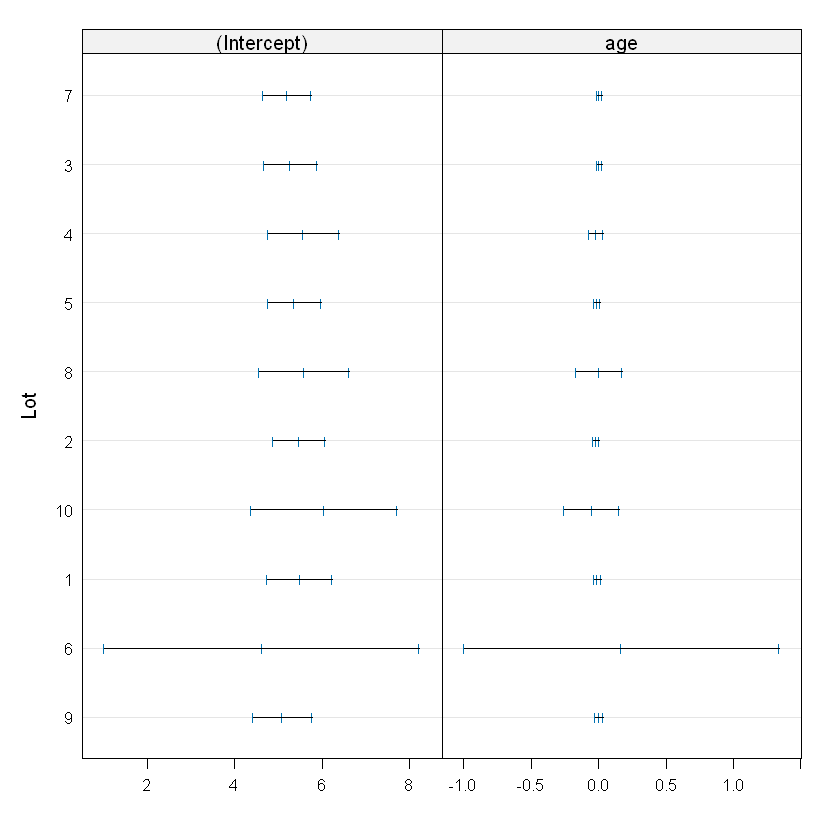

In [26]:
plot( intervals(fm1IGF.lis) )

In [27]:
fm1IGF.lm <- lm( conc ~ age, data = IGF )
summary( fm1IGF.lm )


Call:
lm(formula = conc ~ age, data = IGF)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4877 -0.3736 -0.0091  0.2577  4.4144 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.3510594  0.1037341   51.58   <2e-16 ***
age         -0.0006692  0.0039425   -0.17    0.865    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8327 on 235 degrees of freedom
Multiple R-squared:  0.0001226,	Adjusted R-squared:  -0.004132 
F-statistic: 0.02882 on 1 and 235 DF,  p-value: 0.8654


In [28]:
fm1IGF.lm <- lm( conc ~ age, data = IGF )
summary( fm1IGF.lm )


Call:
lm(formula = conc ~ age, data = IGF)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4877 -0.3736 -0.0091  0.2577  4.4144 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.3510594  0.1037341   51.58   <2e-16 ***
age         -0.0006692  0.0039425   -0.17    0.865    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8327 on 235 degrees of freedom
Multiple R-squared:  0.0001226,	Adjusted R-squared:  -0.004132 
F-statistic: 0.02882 on 1 and 235 DF,  p-value: 0.8654


### 使用 lme 拟合线性混合效应模型

- 拟合单水平模型
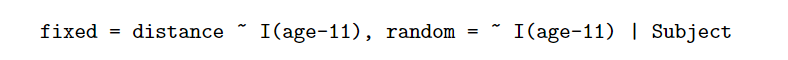
- 固定效应与随机效应
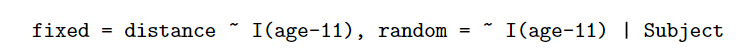


In [43]:
fm1Orth.lme <- lme( distance ~ I(age-11), data = Orthodont, random = ~ I(age-11) | Subject )

In [30]:
fm1Orth.lme

Linear mixed-effects model fit by REML
  Data: Orthodont 
  Log-restricted-likelihood: -221.3183
  Fixed: distance ~ I(age - 11) 
(Intercept) I(age - 11) 
 24.0231481   0.6601852 

Random effects:
 Formula: ~I(age - 11) | Subject
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev    Corr  
(Intercept) 2.1343289 (Intr)
I(age - 11) 0.2264278 0.503 
Residual    1.3100402       

Number of Observations: 108
Number of Groups: 27 

In [31]:
fm2Orth.lme <- update(fm1Orth.lme,fixed = distance~Sex*I(age-11))

In [32]:
summary(fm2Orth.lme)

Linear mixed-effects model fit by REML
  Data: Orthodont 
       AIC      BIC    logLik
  448.5817 469.7368 -216.2908

Random effects:
 Formula: ~I(age - 11) | Subject
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev    Corr  
(Intercept) 1.8303268 (Intr)
I(age - 11) 0.1803454 0.206 
Residual    1.3100396       

Fixed effects:  distance ~ Sex + I(age - 11) + Sex:I(age - 11) 
                          Value Std.Error DF  t-value p-value
(Intercept)           24.968750 0.4860007 79 51.37595  0.0000
SexFemale             -2.321023 0.7614168 25 -3.04829  0.0054
I(age - 11)            0.784375 0.0859995 79  9.12069  0.0000
SexFemale:I(age - 11) -0.304830 0.1347353 79 -2.26243  0.0264
 Correlation: 
                      (Intr) SexFml I(-11)
SexFemale             -0.638              
I(age - 11)            0.102 -0.065       
SexFemale:I(age - 11) -0.065  0.102 -0.638

Standardized Within-Group Residuals:
         Min           Q1          Med          

- 专门提取固定效应

In [33]:
fitted( fm2Orth.lme, level = 0:1 )

,fixed,Subject
1,22.61562,24.84572
2,24.18437,26.57649
3,25.75312,28.30725
4,27.32187,30.03802
5,22.61562,21.27478
6,24.18437,22.79641
7,25.75312,24.31803
8,27.32187,25.83966
9,22.61562,22.03311
10,24.18437,23.56449


- 提取随机效应

In [34]:
resid( fm2Orth.lme, level = 1 )

M01          M01          M01          M01          M02          M02 
 1.154282505 -1.576485854  0.692745788  0.961977430  0.225217565 -0.296407071 
         M02          M02          M03          M03          M03          M03 
-1.318031707  0.660343657  0.966890486 -1.064493702 -1.095877889  0.872737924 
         M04          M04          M04          M04          M05          M05 
 1.035485468  1.748672106 -0.538141257 -1.324954619 -0.902492187  1.045705992 
         M05          M05          M06          M06          M06          M06 
-1.506095828  0.442102351  0.614729469  0.067279036  0.019828603 -0.027621830 
         M07          M07          M07          M07          M08          M08 
 0.426494095 -1.118402012 -0.163298118  0.291805776  2.008130232 -1.812912192 
         M08          M08          M09          M09          M09          M09 
-0.133954617 -0.454997041  0.392480352 -3.782285024  5.042949600 -1.631815777 
         M10          M10          M10          M10          M11          M11 
 1.027278179 -0.142836299  1.187049223  0.016934744  1.182756953 -0.104954940 
         M11          M11          M12          M12          M12          M12 
-0.892666832 -0.680378725 -0.349192569 -0.014198394 -1.179204219  1.155789956 
         M13          M13          M13          M13          M14          M14 
-4.150308176  1.176923777  0.504155729  1.831387681 -0.227160040  1.345199736 
         M14          M14          M15          M15          M15          M15 
-0.082440489 -1.010080713 -0.131399810 -0.406156782 -0.680913754  1.544329274 
         M16          M16          M16          M16          F01          F01 
 0.876807478 -1.014648377 -0.406104233 -0.297560089  0.790268018 -1.079313166 
         F01          F01          F02          F02          F02          F02 
-0.448894350  0.181524466 -0.271238888 -0.910917184  0.449404520  0.809726224 
         F03          F03          F03          F03          F04          F04 
-1.368685829  0.945092935  0.258871698  0.572650462  0.404093259  0.388576559 
         F04          F04          F05          F05          F05          F05 
-0.126940141  0.357543160  0.159650691  0.810487140 -0.538676410 -0.387839961 
         F06          F06          F06          F06          F07          F07 
 0.001678128  0.138703148 -0.724271831 -0.087246811  0.044844166  0.038787508 
         F07          F07          F08          F08          F08          F08 
-0.467269151  0.526674191  0.951853583  0.136320075 -0.179213434 -0.494746943 
         F09          F09          F09          F09          F10          F10 
-0.071888650  0.118585025  0.309058701 -1.000467624 -1.223340635  0.442963039 
         F10          F10          F11          F11          F11          F11 
-0.390733286 -0.724429612  0.282766156 -0.379285079  1.458663685  0.296612449 
attr(,"label")
[1] "Residuals (mm)"

In [35]:
resid( fm2Orth.lme, level = 1, type = "pearson" )

M01          M01          M01          M01          M02          M02 
 0.881105016 -1.203387896  0.528797575  0.734311693  0.171916602 -0.226258092 
         M02          M02          M03          M03          M03          M03 
-1.006100625  0.504063872  0.738062003 -0.812566020 -0.836522690  0.666191993 
         M04          M04          M04          M04          M05          M05 
 0.790423000  1.334823805 -0.410782420 -1.011385130 -0.688904484  0.798224691 
         M05          M05          M06          M06          M06          M06 
-1.149656678  0.337472497  0.469244935  0.051356488  0.015135880 -0.021084728 
         M07          M07          M07          M07          M08          M08 
 0.325558158 -0.853716156 -0.124651279  0.222745759  1.532877449 -1.383860555 
         M08          M08          M09          M09          M09          M09 
-0.102252338 -0.347315474  0.299594255 -2.887153098  3.849463344 -1.245623200 
         M10          M10          M10          M10          M11          M11 
 0.784158084 -0.109032043  0.906117021  0.012926894  0.902840579 -0.080115850 
         M11          M11          M12          M12          M12          M12 
-0.681404440 -0.519357354 -0.266551146 -0.010838140 -0.900128650  0.882255708 
         M13          M13          M13          M13          M14          M14 
-3.168078299  0.898387907  0.384840054  1.397963555 -0.173399363  1.026838950 
         M14          M14          M15          M15          M15          M15 
-0.062929766 -0.771030644 -0.100302163 -0.310033962 -0.519765761  1.178841632 
         M16          M16          M16          M16          F01          F01 
 0.669298430 -0.774517305 -0.309993849 -0.227138231  0.603239772 -0.823878246 
         F01          F01          F02          F02          F02          F02 
-0.342657072  0.138564101 -0.207046320 -0.695335585  0.343046503  0.618092915 
         F03          F03          F03          F03          F04          F04 
-1.044766723  0.721423155  0.197606003  0.437124528  0.308458801  0.296614351 
         F04          F04          F05          F05          F05          F05 
-0.096897938  0.272925450  0.121867068  0.618673749 -0.411190922 -0.296052079 
         F06          F06          F06          F06          F07          F07 
 0.001280975  0.105877062 -0.552862528 -0.066598604  0.034231152  0.029607888 
         F07          F07          F08          F08          F08          F08 
-0.356683213  0.402029200  0.726583799  0.104057976 -0.136800008 -0.377657992 
         F09          F09          F09          F09          F10          F10 
-0.054875171  0.090520180  0.235915532 -0.763692631 -0.933819551  0.338129491 
         F10          F10          F11          F11          F11          F11 
-0.298260657 -0.552982968  0.215845495 -0.289521833  1.113450031  0.226414864 
attr(,"label")
[1] "Standardized residuals"

In [36]:
newOrth <- data.frame( Subject = rep(c("M11","F03"), c(3, 3)),
                        Sex = rep(c("Male", "Female"), c(3, 3)),
                        age = rep(16:18, 2) )

In [37]:
predict( fm2Orth.lme, newdata = newOrth )

M11      M11      M11      F03      F03      F03 
26.96809 27.61195 28.25580 26.61357 27.20668 27.79979 
attr(,"label")
[1] "Predicted values (mm)"

In [38]:
predict( fm2Orth.lme, newdata = newOrth, level = 0:1 )

,Subject,predict.fixed,predict.Subject
,<fct>,<dbl>,<dbl>
1,M11,28.89062,26.96809
2,M11,29.67500,27.61195
3,M11,30.45937,28.25580
4,F03,25.04545,26.61357
5,F03,25.52500,27.20668
6,F03,26.00455,27.79979


- 使用极大似然法估计

In [39]:
fm2Orth.lmeM <- update( fm2Orth.lme, method = "ML" )
summary( fm2Orth.lmeM )

Linear mixed-effects model fit by maximum likelihood
  Data: Orthodont 
      AIC     BIC   logLik
  443.806 465.263 -213.903

Random effects:
 Formula: ~I(age - 11) | Subject
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev    Corr  
(Intercept) 1.7521863 (Intr)
I(age - 11) 0.1541393 0.234 
Residual    1.3100397       

Fixed effects:  distance ~ Sex + I(age - 11) + Sex:I(age - 11) 
                          Value Std.Error DF  t-value p-value
(Intercept)           24.968750 0.4765628 79 52.39341  0.0000
SexFemale             -2.321023 0.7466303 25 -3.10866  0.0046
I(age - 11)            0.784375 0.0843295 79  9.30132  0.0000
SexFemale:I(age - 11) -0.304830 0.1321189 79 -2.30724  0.0237
 Correlation: 
                      (Intr) SexFml I(-11)
SexFemale             -0.638              
I(age - 11)            0.102 -0.065       
SexFemale:I(age - 11) -0.065  0.102 -0.638

Standardized Within-Group Residuals:
        Min          Q1         Med     

In [40]:
compOrth <- compareFits( coef(fm2Orth.lis), coef(fm1Orth.lme) )
compOrth

, , (Intercept)

    coef(fm2Orth.lis) coef(fm1Orth.lme)
M16            23.000          23.07800
M05            23.000          23.12808
M02            23.375          23.45523
M11            23.625          23.60655
M07            23.750          23.79908
M08            23.875          23.84135
M03            24.250          24.24362
M12            24.250          24.28536
M13            24.250          24.44396
M14            24.875          24.77217
M09            25.125          25.07375
M15            25.875          25.77813
M06            26.375          26.15589
M04            26.625          26.29887
M01            27.750          27.44726
M10            29.500          28.99900
F10            18.500          18.98527
F09            21.125          21.33374
F06            21.125          21.35044
F01            21.375          21.57688
F05            22.625          22.69242
F07            23.000          23.07800
F02            23.000          23.11974
F08            23.375  

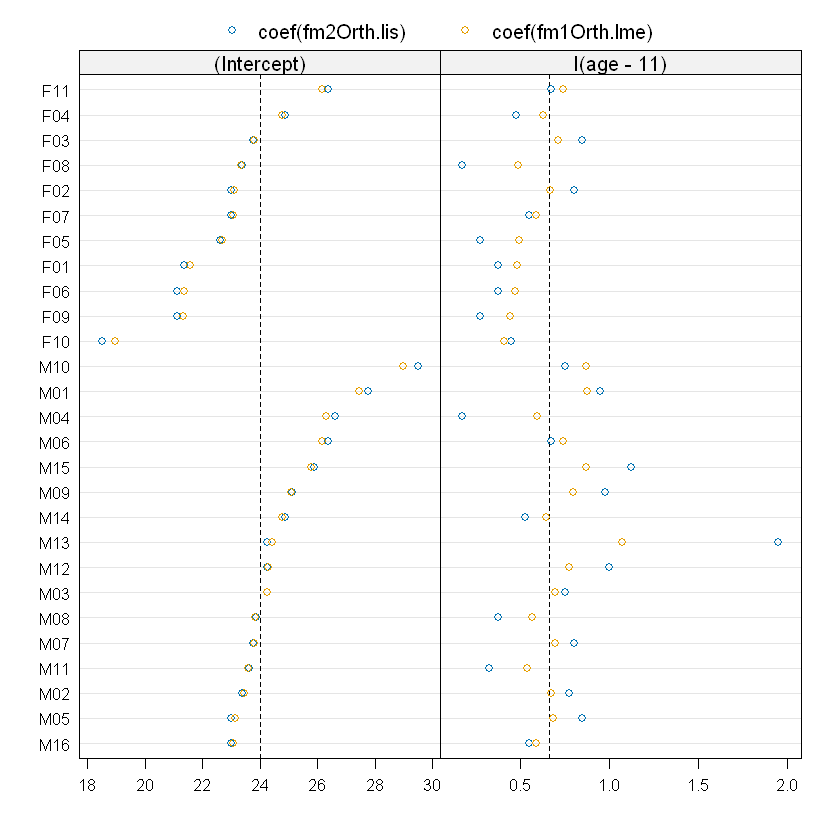

In [41]:
plot( compOrth, mark = fixef(fm1Orth.lme) )

- 收缩估计

lme 拟合的系数是 lmList 拟合的个体拟合系数平均值之间的折衷。出于这个原因，这些估计通常被称为收缩估计，意思是它们将个体估计向总体平均值收缩。

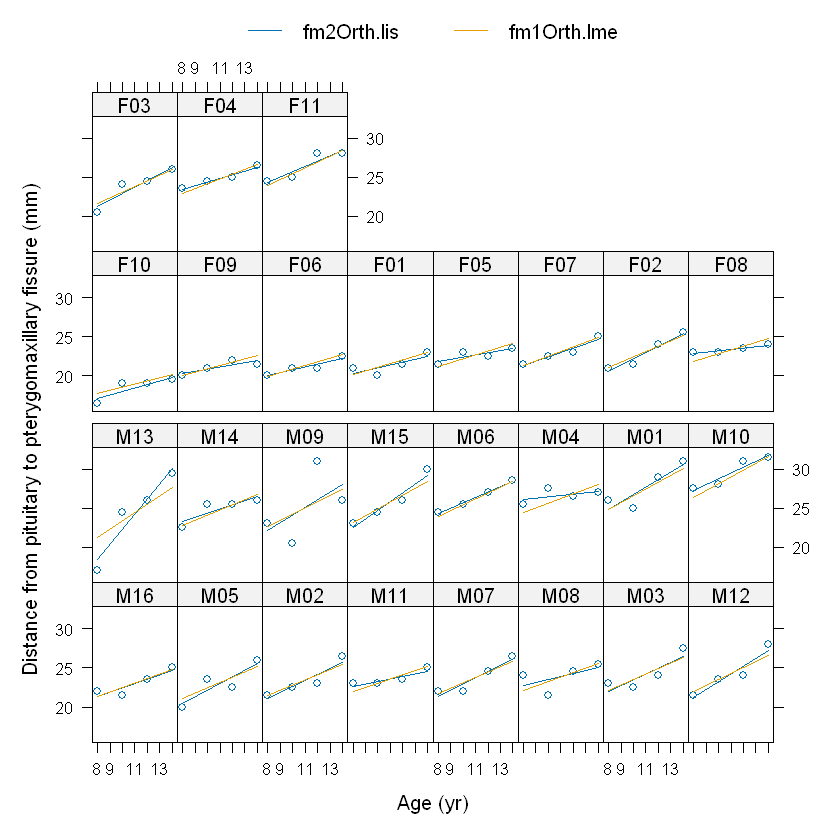

In [48]:
plot( comparePred(fm2Orth.lis, fm1Orth.lme, length.out = 2),layout = c(8,4), between = list(y = c(0, 0.5)) )

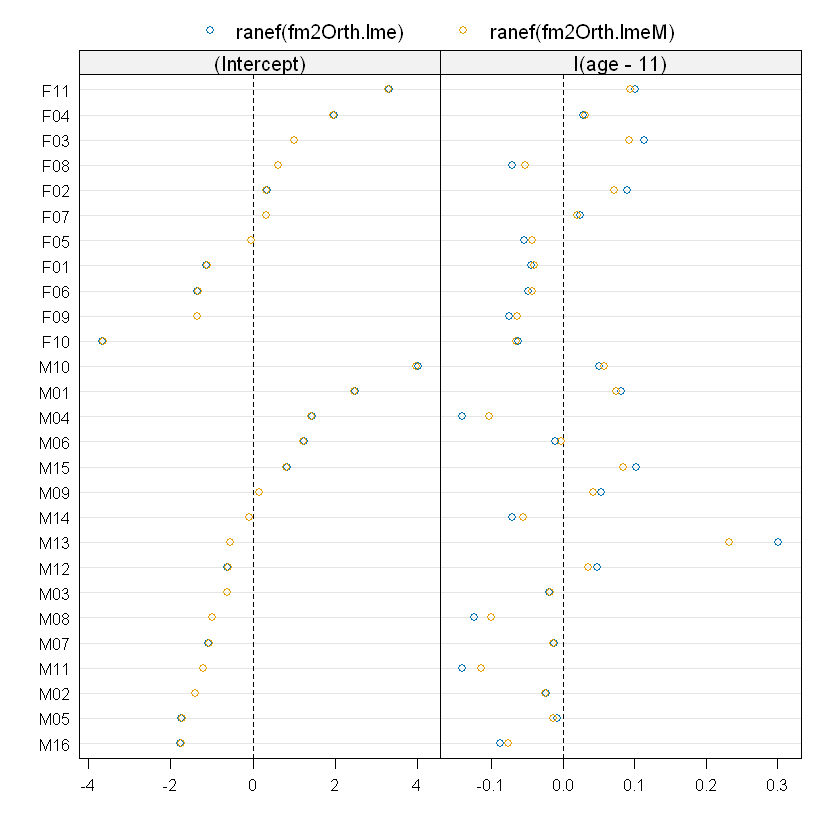

In [49]:
plot( compareFits(ranef(fm2Orth.lme), ranef(fm2Orth.lmeM)), mark = c(0, 0) )

In [50]:
fm4Orth.lm <- lm( distance ~ Sex * I(age-11), Orthodont )
summary( fm4Orth.lm )


Call:
lm(formula = distance ~ Sex * I(age - 11), data = Orthodont)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6156 -1.3219 -0.1682  1.3299  5.2469 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            24.9687     0.2821  88.504  < 2e-16 ***
SexFemale              -2.3210     0.4420  -5.251 8.05e-07 ***
I(age - 11)             0.7844     0.1262   6.217 1.07e-08 ***
SexFemale:I(age - 11)  -0.3048     0.1977  -1.542    0.126    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.257 on 104 degrees of freedom
Multiple R-squared:  0.4227,	Adjusted R-squared:  0.4061 
F-statistic: 25.39 on 3 and 104 DF,  p-value: 2.108e-12


In [51]:
anova( fm2Orth.lme, fm4Orth.lm )

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm2Orth.lme,"lme.formula(fixed = distance ~ Sex + I(age - 11) + Sex:I(age - 11), data = Orthodont, random = ~I(age - 11) | Subject)",1,8,448.5817,469.7368,-216.2908,,NA,NA
fm4Orth.lm,"lm(formula = distance ~ Sex * I(age - 11), data = Orthodont)",2,5,493.5591,506.7811,-241.7796,1 vs 2,50.97746,4.946488e-11


# 
对于第批中第个示踪剂样本中胰岛素样生长因子（IGF-I）的估计浓度（yij）关于示踪剂样本年龄（xij）的简单线性回归，其对应的线性混合效应模型为：
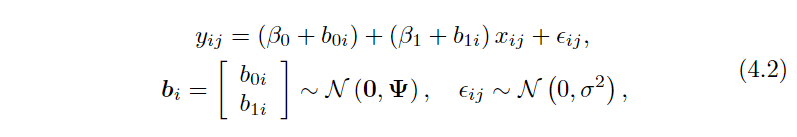

In [57]:
head(IGF)

,Lot,age,conc
,<ord>,<dbl>,<dbl>
1,1,7,4.90
2,1,7,5.68
3,1,8,5.32
4,1,8,5.50
5,1,13,4.94
6,1,13,5.19


In [58]:
fm1IGF.lis <- lmList( IGF )
coef( fm1IGF.lis )

,(Intercept),age
,<dbl>,<dbl>
9,5.098638,0.005727606
6,4.630000,0.170000000
1,5.492892,-0.007790101
10,6.051628,-0.047328244
2,5.476386,-0.014427119
8,5.592181,0.006063830
5,5.373185,-0.009514050
4,5.576804,-0.016657795
3,5.278809,0.010082956


In [62]:
formula(IGF)

conc ~ age | Lot

In [65]:
fm1IGF.lme <- lme( IGF )
fm1IGF.lme 

Linear mixed-effects model fit by REML
  Data: IGF 
  Log-restricted-likelihood: -297.1831
  Fixed: conc ~ age 
 (Intercept)          age 
 5.374974367 -0.002535022 

Random effects:
 Formula: ~age | Lot
 Structure: General positive-definite
            StdDev      Corr  
(Intercept) 0.082512541 (Intr)
age         0.008092177 -1    
Residual    0.820627721       

Number of Observations: 237
Number of Groups: 10 

- 两种拟合的组内标准误差也相似，这表明将随机效应纳入模型并没有带来很大的益处。
- 随机效应之间的估计相关性（约为 -1）清楚地表明，估计的随机效应协方差矩阵是病态的，这意味着模型可能存在过度参数化的问题。标准差和相关系数的置信区间进一步证实了过度参数化的迹象。

In [67]:
summary( fm1IGF.lme )

Linear mixed-effects model fit by REML
  Data: IGF 
       AIC      BIC    logLik
  606.3662 627.1237 -297.1831

Random effects:
 Formula: ~age | Lot
 Structure: General positive-definite
            StdDev      Corr  
(Intercept) 0.082512541 (Intr)
age         0.008092177 -1    
Residual    0.820627721       

Fixed effects:  conc ~ age 
                Value  Std.Error  DF  t-value p-value
(Intercept)  5.374974 0.10748847 226 50.00512  0.0000
age         -0.002535 0.00504434 226 -0.50255  0.6158
 Correlation: 
    (Intr)
age -0.818

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-5.43068335 -0.40522888 -0.03980667  0.36652531  5.21477605 

Number of Observations: 237
Number of Groups: 10 

#### 随机效应的结构化方差 - 协方差矩阵：pdMat 类

In [68]:
pd1 <- pdDiag( ~ age )
pd1

Uninitialized positive definite matrix structure of class pdDiag.

In [69]:
formula( pd1 )

~age

- 构造函数返回的 pdMat 对象会通过 random 参数传递给lme函数。

In [70]:
fm2IGF.lme <- update( fm1IGF.lme, random = pdDiag(~age) )
fm2IGF.lme

Linear mixed-effects model fit by REML
  Data: IGF 
  Log-restricted-likelihood: -297.4003
  Fixed: conc ~ age 
 (Intercept)          age 
 5.369037010 -0.001930131 

Random effects:
 Formula: ~age | Lot
 Structure: Diagonal
         (Intercept)         age  Residual
StdDev: 3.621963e-05 0.005372173 0.8218034

Number of Observations: 237
Number of Groups: 10 

In [71]:
anova( fm1IGF.lme, fm2IGF.lme )

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm1IGF.lme,"lme.formula(fixed = conc ~ age, data = IGF)",1,6,606.3662,627.1237,-297.1831,,NA,NA
fm2IGF.lme,"lme.formula(fixed = conc ~ age, data = IGF, random = pdDiag(~age))",2,5,604.8006,622.0985,-297.4003,1 vs 2,0.4344081,0.5098339


In [72]:
update( fm1IGF.lme, random = list(Lot = pdDiag(~ age)) )

Linear mixed-effects model fit by REML
  Data: IGF 
  Log-restricted-likelihood: -297.4003
  Fixed: conc ~ age 
 (Intercept)          age 
 5.369037010 -0.001930131 

Random effects:
 Formula: ~age | Lot
 Structure: Diagonal
         (Intercept)         age  Residual
StdDev: 3.621963e-05 0.005372173 0.8218034

Number of Observations: 237
Number of Groups: 10 

In [73]:
pd2 <- pdDiag( value = diag(2), form = ~ age )

In [74]:
pd2

Positive definite matrix structure of class pdDiag representing
     [,1] [,2]
[1,]    1    0
[2,]    0    1

In [75]:
lme( conc ~ age, IGF, pdDiag(diag(2), ~age) )

Linear mixed-effects model fit by REML
  Data: IGF 
  Log-restricted-likelihood: -297.4003
  Fixed: conc ~ age 
 (Intercept)          age 
 5.369037010 -0.001930131 

Random effects:
 Formula: ~age | Lot
 Structure: Diagonal
         (Intercept)         age  Residual
StdDev: 3.116343e-05 0.005372173 0.8218034

Number of Observations: 237
Number of Groups: 10 

In [76]:
update( fm1IGF.lme, random = list(Lot = pdDiag(~ age)) )

Linear mixed-effects model fit by REML
  Data: IGF 
  Log-restricted-likelihood: -297.4003
  Fixed: conc ~ age 
 (Intercept)          age 
 5.369037010 -0.001930131 

Random effects:
 Formula: ~age | Lot
 Structure: Diagonal
         (Intercept)         age  Residual
StdDev: 3.621963e-05 0.005372173 0.8218034

Number of Observations: 237
Number of Groups: 10 

- 对正定阵进行赋值

In [77]:
pd2 <- pdDiag( value = diag(2), form = ~ age )
pd2

Positive definite matrix structure of class pdDiag representing
     [,1] [,2]
[1,]    1    0
[2,]    0    1

In [78]:
formula( pd2 )

~age

In [ ]:
lme( conc ~ age, IGF, pdDiag(diag(2), ~age) )

#### 燕麦品种的裂区实验
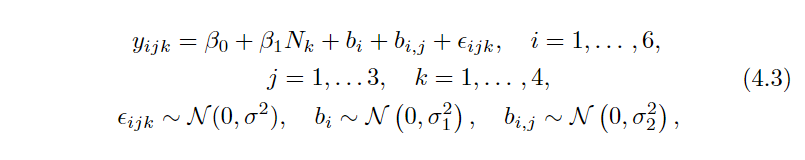
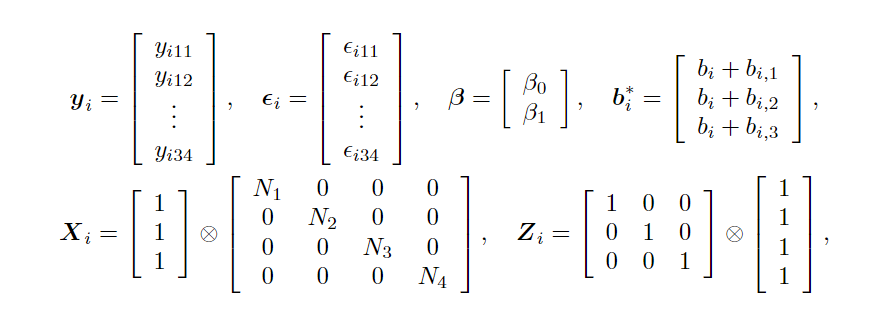
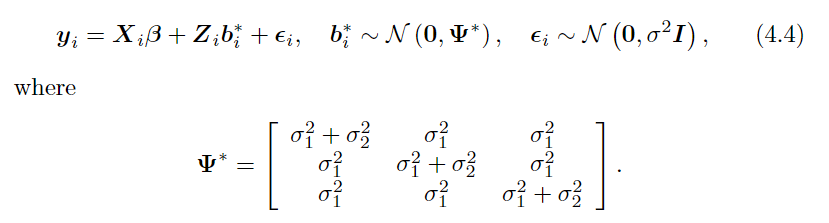

In [79]:
fm4OatsB <- lme( yield ~ nitro, data = Oats, random =list(Block = pdCompSymm(~ Variety - 1)))
summary( fm4OatsB )

Linear mixed-effects model fit by REML
  Data: Oats 
       AIC      BIC    logLik
  603.0418 614.2842 -296.5209

Random effects:
 Formula: ~Variety - 1 | Block
 Structure: Compound Symmetry
                   StdDev   Corr       
VarietyGolden Rain 18.20788            
VarietyMarvellous  18.20788 0.635      
VarietyVictory     18.20788 0.635 0.635
Residual           12.86695            

Fixed effects:  yield ~ nitro 
               Value Std.Error DF  t-value p-value
(Intercept) 81.87222  6.945283 65 11.78818       0
nitro       73.66667  6.781480 65 10.86292       0
 Correlation: 
      (Intr)
nitro -0.293

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.74380733 -0.66475232  0.01710384  0.54298795  1.80298808 

Number of Observations: 72
Number of Groups: 6 

In [80]:
corMatrix( fm4OatsB$modelStruct$reStruct$Block )[1,2]

[1] 0.6347102

In [81]:
fm4OatsC <- lme( yield ~ nitro, data = Oats, random=list(Block=pdBlocked(list(pdIdent(~ 1), pdIdent(~ Variety-1)))))
summary( fm4OatsC )

Linear mixed-effects model fit by REML
  Data: Oats 
       AIC      BIC    logLik
  603.0418 614.2842 -296.5209

Random effects:
 Composite Structure: Blocked

 Block 1: (Intercept)
 Formula: ~1 | Block
        (Intercept)
StdDev:    14.50598

 Block 2: VarietyGolden Rain, VarietyMarvellous, VarietyVictory
 Formula: ~Variety - 1 | Block
 Structure: Multiple of an Identity
        VarietyGolden Rain VarietyMarvellous VarietyVictory Residual
StdDev:            11.0047           11.0047        11.0047 12.86695

Fixed effects:  yield ~ nitro 
               Value Std.Error DF  t-value p-value
(Intercept) 81.87222  6.945283 65 11.78818       0
nitro       73.66667  6.781480 65 10.86292       0
 Correlation: 
      (Intr)
nitro -0.293

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.74380733 -0.66475233  0.01710383  0.54298796  1.80298806 

Number of Observations: 72
Number of Groups: 6 

#### Cell Culture Bioassay with Crossed Random Effects

- 来自在一个细胞培养板上进行的生物测定，该培养板有两个区组，每个区组有 30 个孔。每个区组中的孔按照六行五列进行标记，对应于一种交叉分类。在每个区组内，六种不同的样品被随机分配到行，五种连续稀释液被随机分配到列。响应变量是孔的光密度测量值的对数。

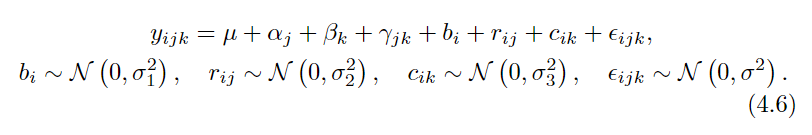

不同区组的随机效应结构
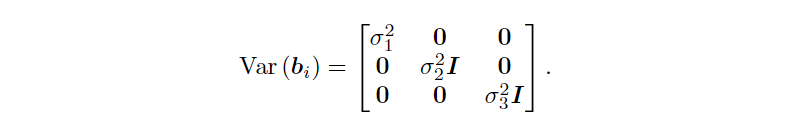